In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
df_train = df_train.drop(columns = ['id'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB


In [4]:
df_train.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [5]:
print(df_train.shape)

(11504798, 11)


In [6]:
print(df_train.isnull().sum())

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [7]:
print(df_train.duplicated(keep="first").sum())

0


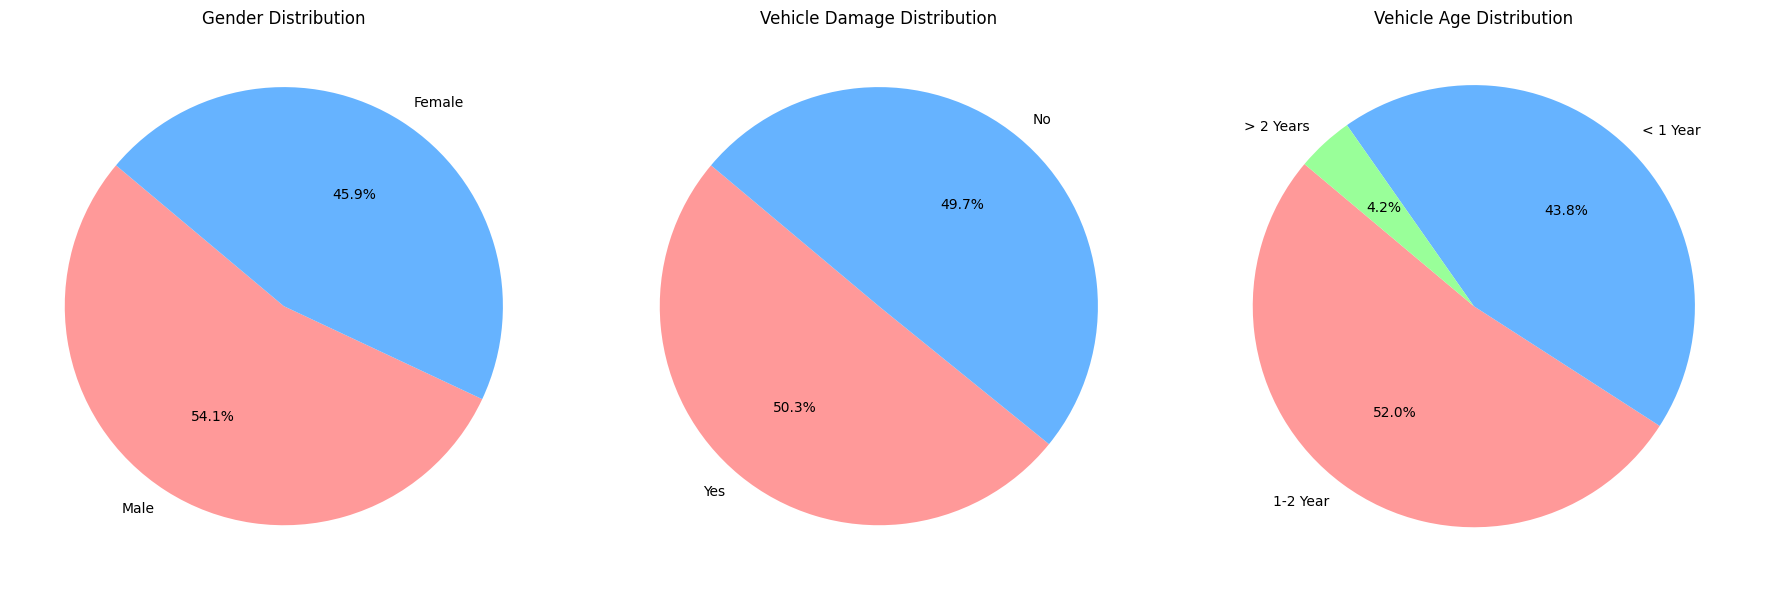

In [8]:
# Gender Pie Chart
gender_counts = df_train['Gender'].value_counts()

# Vehicle Damage Pie Chart
damage_counts = df_train['Vehicle_Damage'].value_counts()

# Vehicle Age Pie Chart
vehicle_age_counts = df_train['Vehicle_Age'].value_counts()

# Create a figure with three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gender Pie Chart
ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
ax1.set_title('Gender Distribution')

# Vehicle Damage Pie Chart
ax2.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
ax2.set_title('Vehicle Damage Distribution')

# Vehicle Age Pie Chart
ax3.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
ax3.set_title('Vehicle Age Distribution')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

(array([3941026., 1265683., 1147450., 1498561., 1456247.,  820598.,
         680038.,  421142.,  246326.,   27727.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

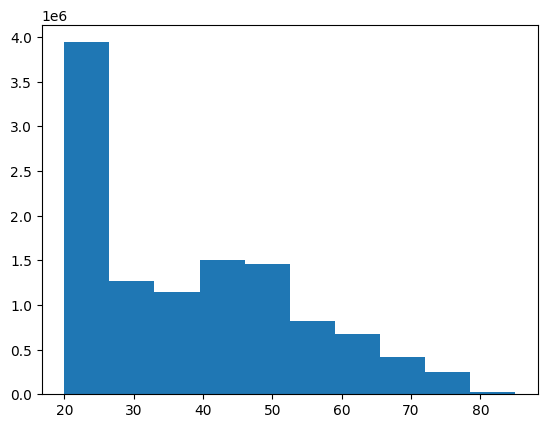

In [9]:
# Age Histogram
plt.hist(df_train['Age'], bins = 10)

In [10]:
print(df_train['Region_Code'].value_counts().sort_index())
print(df_train['Policy_Sales_Channel'].value_counts().sort_index())

Region_Code
0.0       59274
1.0       33966
2.0      118097
3.0      246303
4.0       52504
5.0       36832
6.0      181122
7.0       92240
8.0     1021036
9.0       93371
10.0     126081
11.0     278261
12.0      92142
13.0     108838
14.0     134585
15.0     403977
16.0      54905
17.0      74533
18.0     148548
19.0      44197
20.0      58765
21.0     126793
22.0      36932
23.0      54518
24.0      69136
25.0      70556
26.0      71228
27.0      78878
28.0    3451062
29.0     338146
30.0     367307
31.0      58442
32.0      78797
33.0     232387
34.0      48685
35.0     200035
36.0     261946
37.0     158976
38.0      60587
39.0     138068
39.2          1
40.0      35888
41.0     557581
42.0      13693
43.0      75868
44.0      20305
45.0     159292
46.0     578208
47.0     229190
48.0     114230
49.0      50822
50.0     302334
51.0       1880
52.0       3450
Name: count, dtype: int64
Policy_Sales_Channel
1.0       32960
2.0           6
3.0       14066
4.0       13284
5.0          

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Gender'] = le.fit_transform(df_train['Gender'])
df_train['Vehicle_Damage'] = le.fit_transform(df_train['Vehicle_Damage'])
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

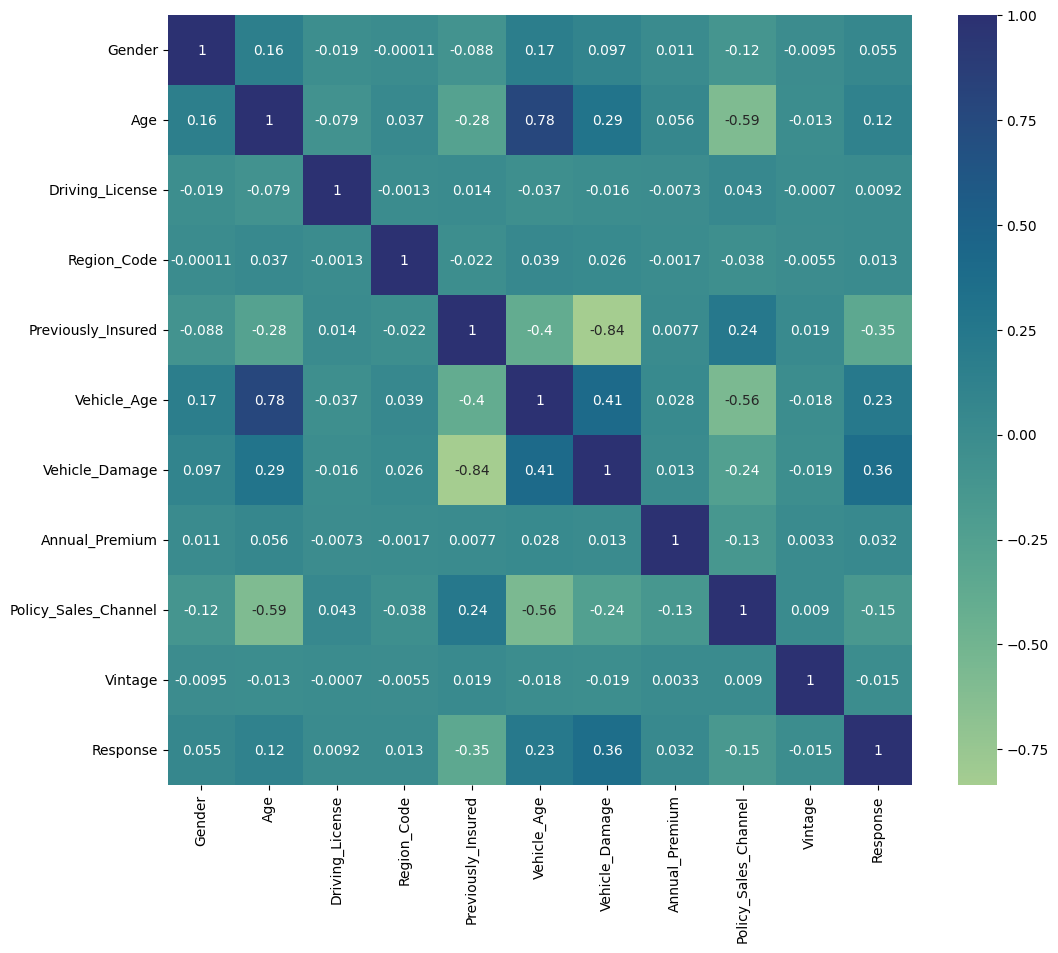

In [12]:
plt.figure(figsize = (12,10))
sns.heatmap(df_train.corr(), annot = True, cmap = "crest")
plt.show()

In [13]:
df_train['Previously_Insured_Vehicle_Damage'] = pd.factorize((df_train['Previously_Insured'].astype(str) + df_train['Vehicle_Damage'].astype(str)))[0]
df_train['Previously_Insured_Annual_Premium'] = pd.factorize((df_train['Previously_Insured'].astype(str) + df_train['Annual_Premium'].astype(str)))[0]
df_train['Previously_Insured_Vehicle_Age'] = pd.factorize((df_train['Previously_Insured'].astype(str) + df_train['Vehicle_Age'].astype(str)))[0]
df_train['Previously_Insured_Vintage'] = pd.factorize((df_train['Previously_Insured'].astype(str) + df_train['Vintage'].astype(str)))[0]

In [14]:
# import optuna
# from sklearn.model_selection import train_test_split
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score

# X = df_train.drop('Response', axis=1)
# y = df_train['Response']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# def objective(trial):
#     param = {
#         'iterations': trial.suggest_int('iterations', 1000, 4000),
#         'depth': trial.suggest_int('depth', 6, 12),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
#         'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
#         'random_strength': trial.suggest_int('random_strength', 0, 10),
#         'eval_metric': 'AUC',
#         'verbose': 0
#     }
    
#     model = CatBoostClassifier(**param)
    
#     model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)
    
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
#     auc = roc_auc_score(y_test, y_pred_proba)
    
#     return auc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=20)

# print(f"Best parameters: {study.best_params}")

**Used Optuna to find the best parameter for the Catboost and applied it to the model**

In [15]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

X = df_train.drop('Response', axis=1)
y = df_train['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.146,
    depth=8,
    l2_leaf_reg=9,
    random_strength=10,
    eval_metric='AUC',
    verbose=500
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC: {roc_auc:.2f}")

0:	test: 0.8351463	best: 0.8351463 (0)	total: 1.47s	remaining: 2h 2m 48s
500:	test: 0.8803982	best: 0.8803982 (500)	total: 11m 16s	remaining: 1h 41m 10s
1000:	test: 0.8825993	best: 0.8825996 (999)	total: 22m 47s	remaining: 1h 31m 3s
1500:	test: 0.8838829	best: 0.8838829 (1500)	total: 34m 26s	remaining: 1h 20m 16s
2000:	test: 0.8846284	best: 0.8846298 (1994)	total: 46m 6s	remaining: 1h 9m 5s
2500:	test: 0.8851902	best: 0.8851930 (2494)	total: 57m 46s	remaining: 57m 43s
3000:	test: 0.8855555	best: 0.8855563 (2999)	total: 1h 9m 25s	remaining: 46m 14s
3500:	test: 0.8858677	best: 0.8858677 (3500)	total: 1h 21m 4s	remaining: 34m 42s
4000:	test: 0.8860692	best: 0.8860692 (4000)	total: 1h 32m 35s	remaining: 23m 7s
4500:	test: 0.8861952	best: 0.8861984 (4478)	total: 1h 44m 6s	remaining: 11m 32s
4999:	test: 0.8863304	best: 0.8863304 (4999)	total: 1h 55m 37s	remaining: 0us

bestTest = 0.8863304322
bestIteration = 4999

Accuracy: 0.88
AUC: 0.89


In [16]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")

In [17]:
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Vehicle_Damage'] = le.fit_transform(df_test['Vehicle_Damage'])
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [18]:
df_test['Previously_Insured_Vehicle_Damage'] = pd.factorize((df_test['Previously_Insured'].astype(str) + df_test['Vehicle_Damage'].astype(str)))[0]
df_test['Previously_Insured_Annual_Premium'] = pd.factorize((df_test['Previously_Insured'].astype(str) + df_test['Annual_Premium'].astype(str)))[0]
df_test['Previously_Insured_Vehicle_Age'] = pd.factorize((df_test['Previously_Insured'].astype(str) + df_test['Vehicle_Age'].astype(str)))[0]
df_test['Previously_Insured_Vintage'] = pd.factorize((df_test['Previously_Insured'].astype(str) + df_test['Vintage'].astype(str)))[0]

In [19]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e7/sample_submission.csv")

In [20]:
df_test=df_test.drop('id',axis=1)
y_pred_prob_test = model.predict_proba(df_test)[:, 1]
submission['Response'] = y_pred_prob_test
submission.head()

,id,Response
0,11504798,0.012238
1,11504799,0.014675
2,11504800,0.021819
3,11504801,0.000196
4,11504802,0.105924


In [21]:
submission.to_csv('submission.csv', index=False)